In [4]:
import numpy
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
WISE_Pipe3D = fits.open("WISE_Pipe3D.fits", memmap=True)
WISE_Pipe3D_table = Table(WISE_Pipe3D[1].data)

In [25]:
W1 = numpy.array(WISE_Pipe3D_table['W1mag'])  # Stores all data of W1
W2 = numpy.array(WISE_Pipe3D_table['W2mag'])  # Stores all data of W2
W3 = numpy.array(WISE_Pipe3D_table['W3mag'])  # Stores all data of W3
W4 = numpy.array(WISE_Pipe3D_table['W4mag'])  # Stores all data of W4

SFR = numpy.array(WISE_Pipe3D_table['log_SFR_Ha']) # Stores all data of SFR      log(Msun/yr)
SM = numpy.array(WISE_Pipe3D_table['log_Mass']) # Stores all data of stellar mass     log(Msun)

SSFRlog = SFR - SM      # Specific star formation rate   log(/yr)

SSFR = 10 ** (SSFRlog)

W1diffW2 = W1 - W2
W2diffW3 = W2 - W3

   
lowDiff = numpy.where(W2diffW3 < 2)


diff2line = numpy.full(len(W1), 2)


[1.98969118e-11 2.72820314e-11 8.99171247e-14 ... 3.25025836e-13
 2.99775748e-11 1.75328532e-11]
[1.98969118e-11 2.72820314e-11 8.99171247e-14 ... 3.25025836e-13
 2.99775748e-11 1.75328532e-11]


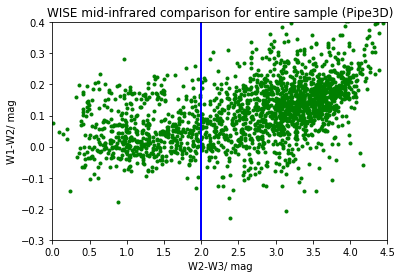

In [82]:
plt.xlabel("W2-W3/ mag")
plt.ylabel("W1-W2/ mag")
plt.title("WISE mid-infrared comparison for entire sample (Pipe3D)")


plt.plot(W2diffW3, W1diffW2, "g.") 
plt.plot(diff2line, W1diffW2, "b-")

plt.ylim(-0.3, 0.4)
plt.xlim(0, 4.5)

plt.show()

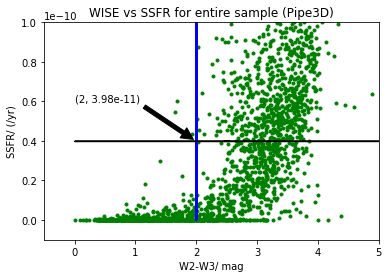

In [91]:
plt.xlabel("W2-W3/ mag")
plt.ylabel("SSFR/ (/yr)")
plt.title("WISE vs SSFR for entire sample (Pipe3D)")

# model = models.Linear1D()
# fitter = fitting.LinearLSQFitter()
# best_fit = fitter(model, W2diffW3, SSFR)
# plt.plot(W2diffW3, best_fit(W2diffW3), color='k', linewidth=1) # A line of best fit that includes data from a range

threshold = numpy.full(len(SSFR), 3.98e-11)

plt.plot(W2diffW3, SSFR, "g.") 
plt.plot(diff2line, SSFR, "b-")
plt.plot(W2diffW3, threshold, "k-")

plt.xlim(-0.5, 5)
plt.ylim(-1e-11, 1e-10)


# print(-4.501077454340658 * 2 * 10 ** (-12) + 8.277747322018518* 10 **(-11))
# 7.377531831150386e-11

plt.annotate('(2, 3.98e-11)', xy=(2, 3.98e-11), xytext=(0, 6e-11), arrowprops=dict(facecolor='black', shrink=0.05))
             

plt.show()


In [97]:
interest = numpy.where((SSFR < 3.98e-11) & (W2diffW3 < 2))
print(len(SSFR[interest]))

523
